# ***Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)***

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente :eyes: ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación! Sabes que puedes apoyarte en librerías como pandas profiling, missingno, sweetviz, autoviz, entre otros y sacar de allí tus conclusiones

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [131]:
df = pd.read_csv('./DataSet/movies_dataset_normalizado.csv' )

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45376 non-null  object 
 1   budget                 45376 non-null  float64
 2   genres                 45376 non-null  object 
 3   id                     45376 non-null  int64  
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  float64
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [134]:
df.columns


Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return'],
      dtype='object')

In [135]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,1991.881193,6.599900e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


### ***Buscamos los outliers***

#### * "popularity" 
Los valores con mas de 10 puntos son 3015, como solución para no perder esta cantidad de información,<br>
cada valor se cambia por la media te los valore <= a 10
<br>
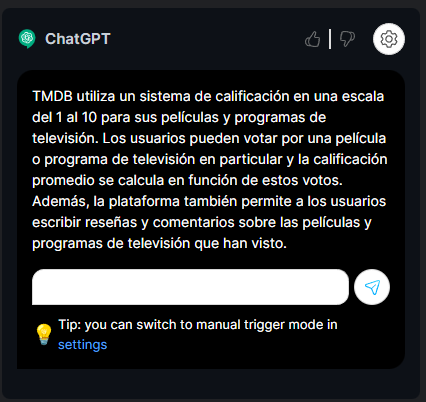

In [136]:
print(df["popularity"].max())
print(df["popularity"].mean())
print(df["popularity"].min())
df['popularity'][df['popularity'] >= 10].count()

547.488298
2.926457567502645
0.0


3017

In [137]:
df['popularity'][df['popularity'] <= 10].mean()

2.0437042463467034

In [138]:
df["popularity"] = np.where(df["popularity"]>10, df['popularity'][df['popularity'] <= 10].mean(), df['popularity'] )

In [139]:
print(df["popularity"].max())
print(df["popularity"].mean())
print(df["popularity"].min())

9.998415
2.043704246346703
0.0


#### * "budget" En el caso de las inversiones por películas la mas alta de de 380.000.000.0  
*   En este caso no es un outliers debido que película con un  El presupuesto de la película mayor a 200.000.000 tenemos 32 y<br>
    todas fueron del año 2005  en adelante, que en realidad  si puede ser lógico.
* la inversion en 0 son 36470 de 45376 seria conveniente hacer un DataFrame con películas  que tenga presupuesto mayor a 0<br>
    si se quieren analizar los valores económicos de las películas




In [144]:
df['budget'].describe()

count    4.534600e+04
mean     4.232580e+06
std      1.744373e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [140]:
df['budget'][df['budget'] == 0].count()

36490

#### * "id" tenemos id duplicados.
Por el análisis y tamizado sobre algunos de los id duplicados se puede llegar a  la conclusion de Eliminarlos, <br>
debido que son filas duplicadas y no tan solo son los "id" eliminado 40 registros duplicados     

In [141]:
rf = df[['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return']][df['id'] == 22649]
rf 

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
947,0,4.0,"['Drama', 'Romance', 'War']",22649,en,British nurse Catherine Barkley (Helen Hayes) ...,1.914697,['Paramount Pictures'],['United States of America'],1932-12-08,25.0,89.0,['English'],Released,Every woman who has loved will understand,A Farewell to Arms,6.2,1932,6.0
15067,0,4.0,"['Drama', 'Romance', 'War']",22649,en,British nurse Catherine Barkley (Helen Hayes) ...,2.411191,['Paramount Pictures'],['United States of America'],1932-12-08,25.0,89.0,['English'],Released,Every woman who has loved will understand,A Farewell to Arms,6.2,1932,6.0


In [142]:
df[['id', 'title']].value_counts()


id      title                                  
141971  Blackout                                   3
4912    Confessions of a Dangerous Mind            2
109962  Rich and Famous                            2
97995   Seven Years Bad Luck                       2
22649   A Farewell to Arms                         2
                                                  ..
37006   Mi mejor enemigo                           1
37015   Lookin' Italian                            1
37019   Dr. Jekyll and Ms. Hyde                    1
37020   Saved by the Bell: Wedding in Las Vegas    1
469172  Manuel on the Island of Wonders            1
Name: count, Length: 45346, dtype: int64

In [143]:
df = df.drop_duplicates(subset= ["id"])
print(df[['id', 'title']].value_counts())



id      title                                  
2       Ariel                                      1
107942  Swimming                                   1
108200  The Doctor Takes a Wife                    1
108204  Double Teamed                              1
108209  Kid Millions                               1
                                                  ..
36984   Trespassing                                1
36992   Shakma                                     1
36996   The President's Man: A Line in the Sand    1
36998   The Eighth Day                             1
469172  Manuel on the Island of Wonders            1
Name: count, Length: 45346, dtype: int64


In [148]:
df.count()

belongs_to_collection    45346
budget                   45346
genres                   45346
id                       45346
original_language        45335
overview                 44405
popularity               45346
production_companies     45346
production_countries     45346
release_date             45346
revenue                  45346
runtime                  45100
spoken_languages         45346
status                   45266
tagline                  20387
title                    45346
vote_average             45346
release_year             45346
return                   45346
dtype: int64

## Creamos un nuevo archivo CSV para trabajara el EDA 

In [149]:
df.to_csv("./DataSet/movies_dataset_Para_EDA.csv", index= False)


In [153]:
df["id"].count()

45346

In [151]:
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",2.043704,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,12.0
1,0,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,2.043704,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.0
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,2.043704,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.0
3,0,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.0
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,0.0
